In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import os

plt.rcParams['figure.figsize'] = 10, 10

## Building a simple drawing tool to  collect segmentation data and store them into folders 

* `size` sets the width of the line drawn
* `color = (B, G, R)` defines the color of the line where `(255,255,255)` means white

In [2]:
drawing=False # true if mouse is pressed
mode=True # if True, draw rectangle. Press 'm' to toggle to curve
size = 17
color = (255,255,255)

## Drawing util
* `draw_on_image_from_path(image_path)` loads up the image from `image_path` in grayscale (required in our case) and opens up a window where the user can draw the mask. It returns  the original (and possibly resized) image and the mask. 
* Press `ESC` when you're done with the drawing to exit the window


In [3]:
def draw_on_image_from_path(image_path):
    
    def drawing_tool(event,former_x,former_y,flags,param):
        global current_former_x,current_former_y,drawing, mode, size, color

        if event==cv2.EVENT_LBUTTONDOWN:
            drawing=True
            current_former_x,current_former_y=former_x,former_y

        elif event==cv2.EVENT_MOUSEMOVE:
            if drawing==True:
                if mode==True:
                    cv2.line(im,(current_former_x,current_former_y),(former_x,former_y),color,size)
                    cv2.line(mask,(current_former_x,current_former_y),(former_x,former_y),color,size)

                    current_former_x = former_x
                    current_former_y = former_y
                    #print former_x,former_y
        elif event==cv2.EVENT_LBUTTONUP:
            drawing=False
            if mode==True:
                cv2.line(im,(current_former_x,current_former_y),(former_x,former_y),color,size)
                cv2.line(mask,(current_former_x,current_former_y),(former_x,former_y),color,size)

                current_former_x = former_x
                current_former_y = former_y
        return former_x,former_y    

    
    im_org = read_and_shrink_image(image_path, 5)
    im = im_org.copy()
    mask = np.zeros(im.shape)
    cv2.namedWindow("poor_man\'s_photoshop [Press ESC to exit window]")
    cv2.setMouseCallback('poor_man\'s_photoshop [Press ESC to exit window]',drawing_tool)
    
    while(1):
        cv2.imshow('poor_man\'s_photoshop [Press ESC to exit window]',im)
        k=cv2.waitKey(1)&0xFF
        if k==27:
#             print("break")
            break
    cv2.destroyAllWindows()
    return im_org, mask

def read_and_shrink_image(image_path, shrink_factor = 2):
    raw_img = cv2.imread(image_path, 0) ## 0 means grayscale = 1 color channel 
    raw_img_small = cv2.resize(raw_img, (int(raw_img.shape[1]/shrink_factor), int(raw_img.shape[0]/shrink_factor)))
    return raw_img_small

## Drawing on a sample image

In [24]:
im, mask = draw_on_image_from_path("data/original_images/sample.jpg")

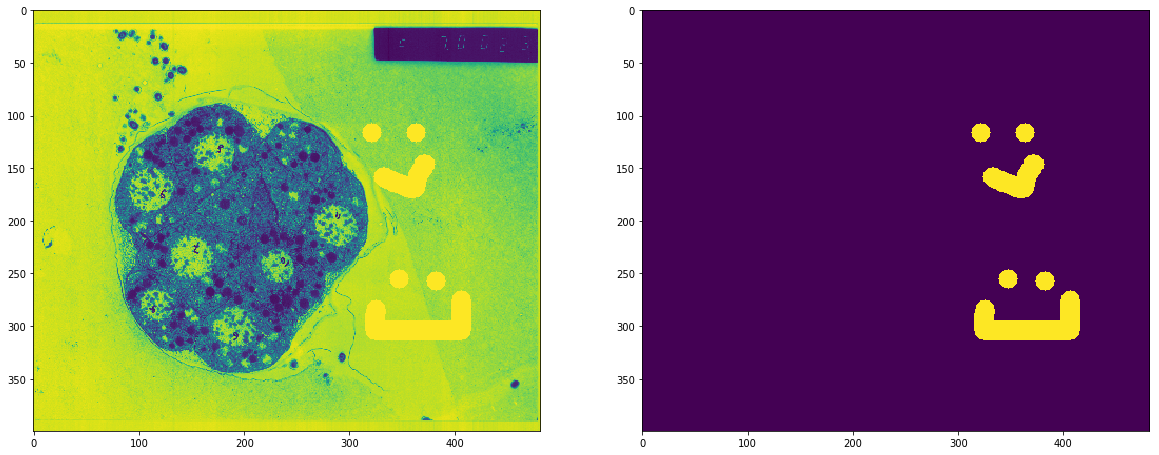

In [9]:
fig, axs = plt.subplots(1,2, figsize = (20,10))
axs.flat[0].imshow(im)
axs.flat[1].imshow(mask)

## Scaling up the process 
* `draw_mask_and_save_pair()` loads the image from a path and saves both the original (possibly resized) image and the mask as 2 filenames given as args
* `generate_training_data()` it is a extension of the function described above, but now instead of a simgle image it iterates through all the images within a given folder, the final image-mask pairs are saved in `image_folder` and `mask_folder` respectively 

In [4]:
def draw_mask_and_save_pair(image_path, image_save_name, mask_save_name):
    im, mask = draw_on_image_from_path(image_path)
    cv2.imwrite(image_save_name, im)
    cv2.imwrite(mask_save_name, mask)
#     print("saved image-- ", image_save_name)
#     print("saved mask-- ", mask_save_name)

In [5]:
def generate_training_data(original_image_folder, image_folder , mask_folder):
    
    for i in os.listdir(original_image_folder):
        
        image_path = original_image_folder + "/" + i
        image_save_name = image_folder + "/" + "real_"+ i
        mask_save_name  = mask_folder + "/" + "mask_" + i
        
        draw_mask_and_save_pair(image_path, image_save_name, mask_save_name)
    print("Saved images at-- ", image_folder)
    print("Saved masks at-- ", image_folder)

In [ ]:
generate_training_data("data/original_images", "data/images", "data/masks")